<a href="https://colab.research.google.com/github/venkatchintha/Project0/blob/master/Copy_of_TRAIN_gluon_ssd_300_vgg16_atrous_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/1_gluoncv_finetune/TRAIN-gluon-ssd_300_vgg16_atrous_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Aug  9 17:34:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
# !cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/My Drive/Kaggle/nexet/nexet/train_labels.csv')
df1.head()
df1.shape

(49281, 2)

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [ ]:
from detector_prototype import Detector

In [ ]:
gtf = Detector();

In [ ]:
root= "/content/drive/My Drive/Kaggle/nexet/nexet";
img_dir = "nexet_2017_1/";
anno_file = "/train_labels.csv";
batch_size=1;

In [ ]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

100%|██████████| 49281/49281 [22:31<00:00, 36.46it/s]


MXNetError: ignored

In [ ]:
pretrained = True;         
gpu=True;
model_name = "ssd_300_vgg16_atrous_coco";

In [ ]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

100%|██████████| 125080/125080 [00:02<00:00, 53832.59KB/s]


KeyError: ignored

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [ ]:
from inference_prototype import Infer

In [ ]:
model_name = "ssd_300_vgg16_atrous_coco";
params_file = "saved_model.params";
class_list = ["kangaroo"];

In [ ]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [ ]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg4.jpeg"; 
visualize = True;
thresh = 0.85;

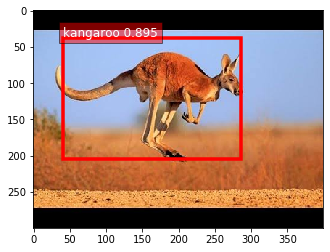

In [ ]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);